In [3]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1-6weNDigY-31RlPeIE2rO9p3uZQXWCRc
!gdown 1-4OV-yEuBtN3VYUzjE_hI8ES3FnqLjty
!gdown 1-48qL_WupDPGMHQccjTwn5IK0_U1DWbP
!gdown 1-3ecwyKn0p5l3ZkoAXDKgkusUQNdRJlw

Downloading...
From (original): https://drive.google.com/uc?id=1-6weNDigY-31RlPeIE2rO9p3uZQXWCRc
From (redirected): https://drive.google.com/uc?id=1-6weNDigY-31RlPeIE2rO9p3uZQXWCRc&confirm=t&uuid=34064499-536f-45c5-8805-9d61467920f8
To: /content/97.mat
100% 3.90M/3.90M [00:00<00:00, 113MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-4OV-yEuBtN3VYUzjE_hI8ES3FnqLjty
From (redirected): https://drive.google.com/uc?id=1-4OV-yEuBtN3VYUzjE_hI8ES3FnqLjty&confirm=t&uuid=7c2b448b-ff7a-437f-99b9-a265bd86e027
To: /content/118.mat
100% 2.94M/2.94M [00:00<00:00, 82.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-48qL_WupDPGMHQccjTwn5IK0_U1DWbP
From (redirected): https://drive.google.com/uc?id=1-48qL_WupDPGMHQccjTwn5IK0_U1DWbP&confirm=t&uuid=1c7a1f7a-1eaa-450b-a21e-ceb8d3a48582
To: /content/105.mat
100% 2.91M/2.91M [00:00<00:00, 78.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-3ecwyKn0p5l3ZkoAXDKgkusUQNdRJlw
From (redirected): h

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
# Load MATLAB file
normal_bearings_data = loadmat('/content/97.mat')
faulty_bearings_data1 = loadmat('/content/105.mat')
faulty_bearings_data2 = loadmat('/content/118.mat')
faulty_bearings_data3 = loadmat('/content/130.mat')

normal_data = normal_bearings_data['X097_DE_time']
fault_data1 = faulty_bearings_data1['X105_DE_time']
fault_data2 = faulty_bearings_data2['X118_DE_time']
fault_data3 = faulty_bearings_data3['X130_DE_time']

def select_samples(data, M, N, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    samples = []
    for _ in range(M):
        start_index = np.random.randint(0, len(data) - N)
        sample = data[start_index:start_index + N]
        samples.append(sample)
    return np.array(samples)

M = 200
N = 300
normal_samples = select_samples(normal_data, M, N, 64)
faulty_samples1 = select_samples(fault_data1, M, N, 64)
faulty_samples2 = select_samples(fault_data2, M, N, 64)
faulty_samples3 = select_samples(fault_data3, M, N, 64)

labels_normal = np.zeros(M)
labels_faulty1 = np.ones(M)
labels_faulty2 = 2*np.ones(M)
labels_faulty3 = 3*np.ones(M)

normal_samples_flat = normal_samples.reshape(M, -1)
faulty_samples_flat1 = faulty_samples1.reshape(M, -1)
faulty_samples_flat2 = faulty_samples2.reshape(M, -1)
faulty_samples_flat3 = faulty_samples3.reshape(M, -1)

data_combined = np.vstack((normal_samples_flat, faulty_samples_flat1, faulty_samples_flat2, faulty_samples_flat3))

labels_combined = np.concatenate((labels_normal, labels_faulty1, labels_faulty2, labels_faulty3))

df = pd.DataFrame(data_combined)
df['label'] = labels_combined

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.155836,-0.184833,-0.159591,-0.107437,-0.046313,0.031084,0.071972,0.105351,0.100344,0.077188,...,-0.071764,-0.040889,-0.007302,0.017941,0.015229,-0.024617,-0.070303,-0.099927,-0.097632,0.0
1,0.122666,0.165849,0.162929,0.141650,0.101596,0.061124,0.066131,0.065922,0.067800,0.048399,...,0.071346,0.124752,0.131845,0.097841,0.027120,-0.013769,-0.029415,-0.023991,-0.021279,0.0
2,0.032961,0.076979,0.113487,0.126421,0.098466,0.053614,0.018775,0.006676,0.016272,0.008345,...,-0.003964,0.023991,0.070303,0.081151,0.054240,0.017524,-0.010639,-0.001252,0.015229,0.0
3,0.049442,0.079691,0.087618,0.060707,0.011474,-0.012100,0.010014,0.026911,0.035673,0.025034,...,-0.081151,-0.041723,-0.014603,-0.015438,-0.004590,0.031084,0.084072,0.113278,0.120371,0.0
4,0.009388,0.015855,0.034422,0.058412,0.049859,0.042975,0.067591,0.098884,0.125795,0.103056,...,-0.069678,-0.073224,-0.035673,0.015855,0.063002,0.102013,0.129342,0.141024,0.136434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.226597,0.600198,-0.131572,0.024365,0.112892,0.091370,-0.239998,-0.034517,0.310657,-0.266394,...,0.126293,0.157968,-0.030863,-0.034517,0.133197,0.013807,0.017462,-0.007716,0.025990,3.0
796,-0.019086,-0.087715,0.119390,0.091776,-0.133603,0.064568,0.307408,-0.035736,-0.222536,0.151065,...,-0.108832,0.361824,-0.127105,-0.216851,0.336647,0.021929,-0.203450,0.280201,0.245683,3.0
797,0.187206,-0.230658,-0.091370,0.412991,0.296444,-0.127512,-0.084060,0.117765,0.156750,0.000406,...,0.056040,0.508016,-0.177866,-0.335429,0.178679,0.439793,-0.233500,-0.190049,0.329743,3.0
798,-0.177054,-0.276140,0.011777,0.020304,-0.226597,0.424362,0.591670,-1.019687,-0.598573,2.193280,...,0.074720,-0.053604,-0.265175,0.079593,0.325276,-0.215633,-0.463346,0.118578,0.229034,3.0


In [8]:
def standard_deviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2) / len(x))

def peak(x):
    return np.max(np.abs(x))

def skewness(x):
    return np.sum((x - np.mean(x))**3) / (len(x) * standard_deviation(x)**3)

def kurtosis(x):
    return np.sum((x - np.mean(x))**4) / (len(x) * standard_deviation(x)**4)

def crest_factor(x):
    return peak(x) / np.sqrt(np.mean(x**2))

def clearance_factor(x):
    return peak(x) / np.mean(np.sqrt(np.abs(x)))

def peak_to_peak(x):
    return np.max(x) - np.min(x)

def shape_factor(x):
    return np.sqrt(np.mean(x**2)) / np.mean(np.abs(x))

def impact_factor(x):
    return peak(x) / np.mean(np.abs(x))

def square_mean_root(x):
    return np.sqrt(np.mean(np.sqrt(np.abs(x))))

def mean(x):
    return np.mean(x)

def absolute_mean(x):
    return np.mean(np.abs(x))

def root_mean_square(x):
    return np.sqrt(np.mean(x**2))

def impulse_factor(x):
    return peak(x) / root_mean_square(x)

feature_functions = {
    'Standard Deviation': standard_deviation,
    'Peak': peak,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Crest Factor': crest_factor,
    'Clearance Factor': clearance_factor,
    'Peak to Peak': peak_to_peak,
    'Shape Factor': shape_factor,
    'Impact Factor': impact_factor,
    'Square Mean Root': square_mean_root,
    'Mean': mean,
    'Absolute Mean': absolute_mean,
    'Root Mean Square': root_mean_square,
    'Impulse Factor': impulse_factor,
}


In [9]:
data_features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

extracted_features_df = pd.DataFrame()

for name, func in feature_functions.items():
    extracted_features_df[name] = data_features.apply(func, axis=1)

extracted_features_df['label'] = labels

In [ ]:
extracted_features_df

,Standard Deviation,Peak,Skewness,Kurtosis,Crest Factor,Clearance Factor,Peak to Peak,Shape Factor,Impact Factor,Square Mean Root,Mean,Absolute Mean,Root Mean Square,Impulse Factor,label
0,0.082875,0.202148,0.030082,2.239026,2.422692,0.822638,0.386982,1.198659,2.903980,0.495713,0.009688,0.069611,0.083440,2.422692,0.0
1,0.075542,0.198810,-0.233975,2.636864,2.558892,0.852953,0.380723,1.226810,3.139274,0.482789,0.018159,0.063330,0.077694,2.558892,0.0
2,0.069845,0.172525,-0.345102,2.790606,2.397219,0.776782,0.338374,1.239060,2.970297,0.471277,0.017355,0.058083,0.071969,2.397219,0.0
3,0.077919,0.243871,-0.064725,3.210181,3.075356,1.050382,0.476060,1.253827,3.855965,0.481844,0.014728,0.063245,0.079299,3.075356,0.0
4,0.073374,0.178783,-0.145831,2.454102,2.408322,0.786682,0.334410,1.226038,2.952695,0.476721,0.011280,0.060549,0.074236,2.408322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.609554,2.978654,-0.119518,8.766335,4.883501,6.219620,5.563403,1.771710,8.652145,0.692035,0.021753,0.344268,0.609942,4.883501,3.0
796,0.632221,2.434090,0.087187,6.808148,3.847327,4.572275,4.674071,1.617976,6.224881,0.729629,0.023847,0.391026,0.632671,3.847327,3.0
797,0.707071,2.608302,0.144037,6.007329,3.687545,4.666300,4.998535,1.587292,5.853210,0.747640,0.019064,0.445619,0.707328,3.687545,3.0
798,0.745096,2.861701,0.073547,6.231984,3.837001,4.865896,5.603200,1.562768,5.996341,0.766886,0.032781,0.477241,0.745817,3.837001,3.0


In [10]:
X = extracted_features_df.drop(columns=['label'])
y = extracted_features_df['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                  train_size=0.6, random_state=64, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,
                                                    test_size=0.5, random_state=64, shuffle=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
valid_normalized_data = scaler.transform(X_valid)
test_normalized_data = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [13]:
## Activation Function
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## Loss
def bce(y, y_hat):
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def categorical_cross_entropy(y, y_hat):
    return -np.mean(np.sum(y * np.log(y_hat), axis=1))


## Accuracy
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat < t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

class MLP:
    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_activation = hidden_activation
        self.output_size = output_size
        self.output_activation = output_activation
        self.n_iter = n_iter
        self.loss_fn = loss_fn
        self.eta = eta
        self.random_state = random_state
        np.random.seed(self.random_state)  # Set random seed

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        self.as_ = [None] * len(self.hidden_layer_sizes)  # Initialize as_ with None
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y, X_val=None, y_val=None):  # Add optional validation data
        n, self.input_size = X.shape
        self._init_weights()
        train_losses = []
        val_losses = []
        train_accs = []
        val_accs = []
        for _ in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self.loss_fn(y, y_hat)
            self._gradient_descent(X, y, y_hat)
            train_losses.append(loss)
            train_acc = accuracy(y, y_hat)
            train_accs.append(train_acc)
            if X_val is not None and y_val is not None:
                val_loss = self.loss_fn(y_val, self.predict(X_val))
                val_losses.append(val_loss)
                val_acc = accuracy(y_val, self.predict(X_val))
                val_accs.append(val_acc)
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            else:
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f}")
        if X_val is not None and y_val is not None:
            self.plot_history(train_losses, val_losses, train_accs, val_accs)
        else:
            self.plot_history(train_losses, None, train_accs, None)


    def plot_history(self, train_losses, val_losses=None, train_accs=None, val_accs=None):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Training Accuracy')
        if val_accs is not None:
            plt.plot(val_accs, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.show()
    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [16]:
mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=bce, eta=0.06, random_state=64)

# mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=categorical_cross_entropy, eta=0.06, random_state=64)

# mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.06, random_state=64)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

<ipython-input-13-d5044df48fde>:11: RuntimeWarning: divide by zero encountered in log
  return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-13-d5044df48fde>:11: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


Train Loss: nan | Train Acc: 2.8687 | Val Loss: 1.0859 | Val Acc: 3.0312
Train Loss: nan | Train Acc: 3.0167 | Val Loss: 0.7763 | Val Acc: 3.2687
Train Loss: nan | Train Acc: 3.2354 | Val Loss: 0.5954 | Val Acc: 3.2812
Train Loss: nan | Train Acc: 3.3250 | Val Loss: 0.4870 | Val Acc: 3.3813
Train Loss: nan | Train Acc: 3.4167 | Val Loss: 0.4054 | Val Acc: 3.5000
Train Loss: nan | Train Acc: 3.5125 | Val Loss: 0.3473 | Val Acc: 3.5938
Train Loss: nan | Train Acc: 3.5938 | Val Loss: 0.3036 | Val Acc: 3.6063
Train Loss: nan | Train Acc: 3.6729 | Val Loss: 0.2711 | Val Acc: 3.6750
Train Loss: nan | Train Acc: 3.6979 | Val Loss: 0.2455 | Val Acc: 3.7188
Train Loss: nan | Train Acc: 3.7313 | Val Loss: 0.2253 | Val Acc: 3.7500
Train Loss: nan | Train Acc: 3.7604 | Val Loss: 0.2089 | Val Acc: 3.7625
Train Loss: nan | Train Acc: 3.7771 | Val Loss: 0.1954 | Val Acc: 3.7687
Train Loss: nan | Train Acc: 3.7875 | Val Loss: 0.1842 | Val Acc: 3.7812
Train Loss: nan | Train Acc: 3.8062 | Val Loss: 0.1

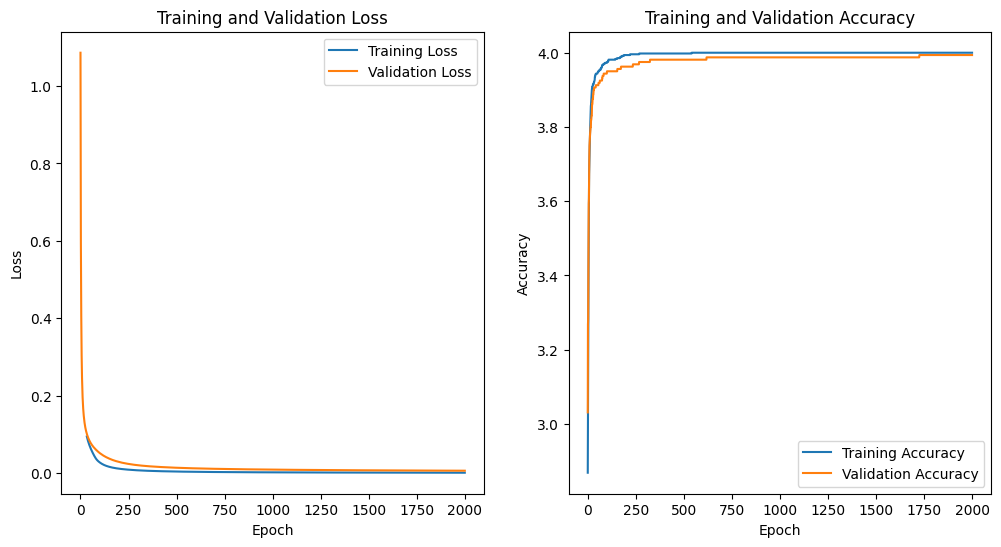

In [19]:
mlp.fit(train_normalized_data, train_labels_onehot, valid_normalized_data, validate_labels_onehot)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_hat = mlp.predict(test_normalized_data)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      0.98      0.99        44
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        46

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



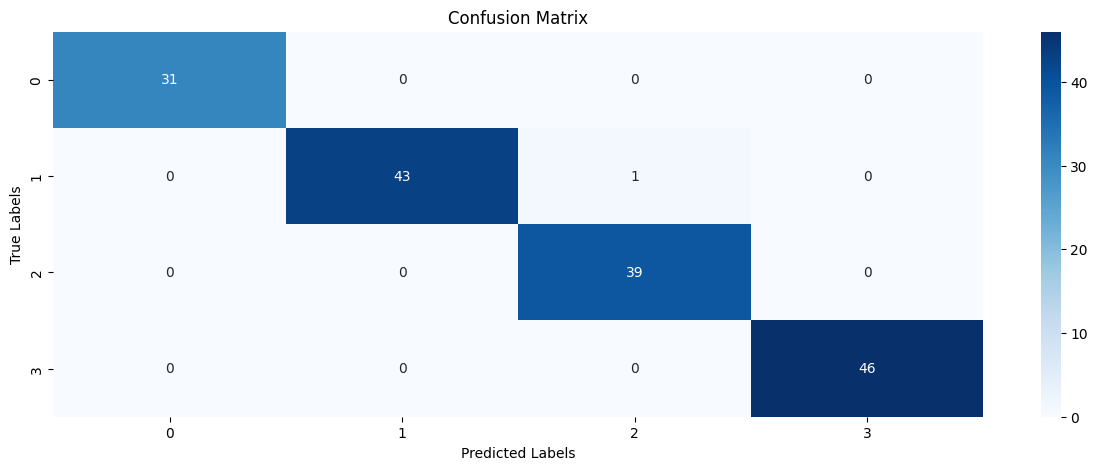

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cm1 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [ ]:
mlp2 = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.06, random_state=64)

In [ ]:
train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()

Train Loss: 0.2627 | Train Acc: 2.8687 | Val Loss: 0.1937 | Val Acc: 3.0312
Train Loss: 0.1996 | Train Acc: 3.0167 | Val Loss: 0.1569 | Val Acc: 3.2563
Train Loss: 0.1535 | Train Acc: 3.2354 | Val Loss: 0.1428 | Val Acc: 3.2375
Train Loss: 0.1320 | Train Acc: 3.3250 | Val Loss: 0.1213 | Val Acc: 3.3500
Train Loss: 0.1104 | Train Acc: 3.4167 | Val Loss: 0.1041 | Val Acc: 3.4813
Train Loss: 0.0924 | Train Acc: 3.5125 | Val Loss: 0.0906 | Val Acc: 3.5438
Train Loss: 0.0783 | Train Acc: 3.5938 | Val Loss: 0.0802 | Val Acc: 3.5812
Train Loss: 0.0680 | Train Acc: 3.6729 | Val Loss: 0.0721 | Val Acc: 3.6500
Train Loss: 0.0601 | Train Acc: 3.6979 | Val Loss: 0.0659 | Val Acc: 3.7062
Train Loss: 0.0537 | Train Acc: 3.7313 | Val Loss: 0.0610 | Val Acc: 3.7313
Train Loss: 0.0485 | Train Acc: 3.7604 | Val Loss: 0.0571 | Val Acc: 3.7375
Train Loss: 0.0441 | Train Acc: 3.7771 | Val Loss: 0.0540 | Val Acc: 3.7375
Train Loss: 0.0404 | Train Acc: 3.7875 | Val Loss: 0.0515 | Val Acc: 3.7500
Train Loss: 

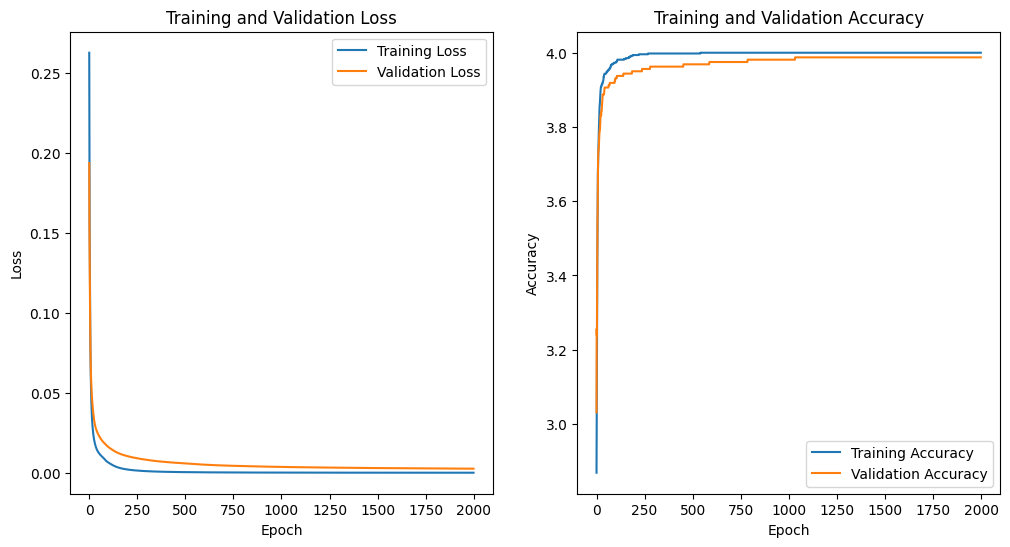

In [ ]:
mlp2.fit(train_normalized_data, train_labels_onehot, valid_normalized_data, validate_labels_onehot)

In [ ]:
y_hat = mlp.predict(test_normalized_data)
y_hat = np.argmax(y_hat, axis=1)
# test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.93      0.96        44
           2       0.93      0.95      0.94        39
           3       1.00      1.00      1.00        46

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



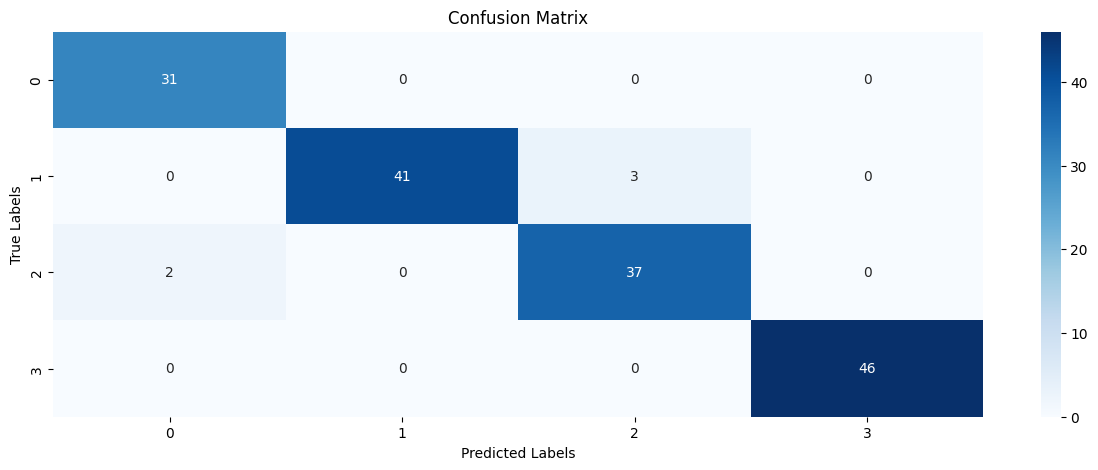

In [ ]:
cm2 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(16, 12), random_state=64)
clf.fit(train_normalized_data, train_labels_onehot)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 12), random_state=64,
              solver='lbfgs')

In [49]:
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf, train_normalized_data, train_labels_onehot,scoring=scoring,
                      cv=5, return_train_score=True)


scores['train_prec_macro'],scores['test_prec_macro'],scores['train_rec_macro'],scores['test_rec_macro']


(array([1., 1., 1., 1., 1.]),
 array([1.        , 0.98809524, 1.        , 1.        , 0.98958333]),
 array([1., 1., 1., 1., 1.]),
 array([1.        , 0.98913043, 1.        , 1.        , 1.        ]))

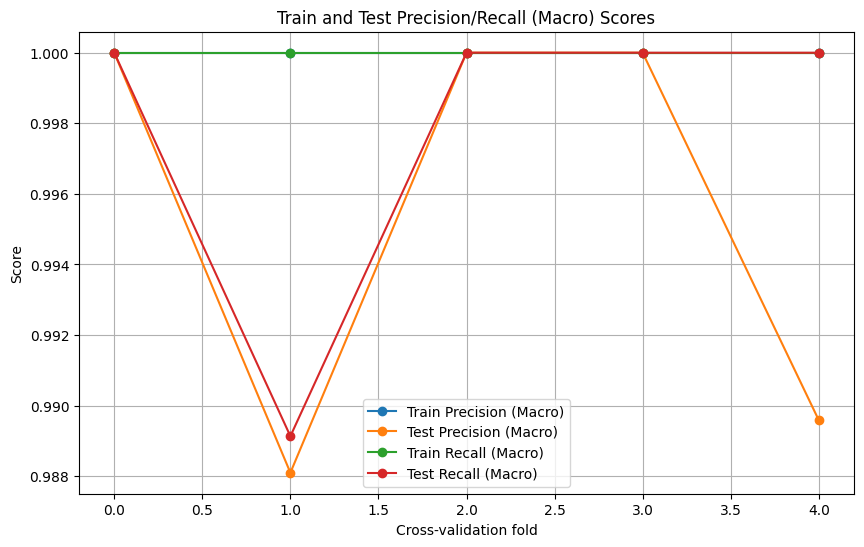

In [50]:
train_prec_macro = scores['train_prec_macro']
test_prec_macro = scores['test_prec_macro']
train_rec_macro = scores['train_rec_macro']
test_rec_macro = scores['test_rec_macro']

plt.figure(figsize=(10, 6))

plt.plot(train_prec_macro, label='Train Precision (Macro)', marker='o')
plt.plot(test_prec_macro, label='Test Precision (Macro)', marker='o')

plt.plot(train_rec_macro, label='Train Recall (Macro)', marker='o')
plt.plot(test_rec_macro, label='Test Recall (Macro)', marker='o')

plt.xlabel('Cross-validation fold')
plt.ylabel('Score')
plt.title('Train and Test Precision/Recall (Macro) Scores')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
scores = cross_val_score(clf, train_normalized_data, train_labels_onehot,
                         cv=5, n_jobs=1)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9958333333333333
